# Scenario
<p>Grey and Gray. Colour and Color. Words like these have been the cause of many heated arguments between Brits and Americans. Accents (and jokes) aside, there are many words that are pronounced the same way but have different spellings. While it is easy for us to realize their equivalence, basic programming commands will fail to equate such two strings. </p>
<p>More extreme than word spellings are names because people have more flexibility in choosing to spell a name in a certain way. To some extent, tradition sometimes governs the way a name is spelled, which limits the number of variations of any given English name. But if we consider global names and their associated English spellings, you can only imagine how many ways they can be spelled out. </p>

In [27]:
# Import packages
import pandas as pd
import numpy as np
import fuzzy
import matplotlib.pyplot as plt

In [10]:
# Exploring the output of fuzzy.nysiis
fuzzy.nysiis('sheet')

# Testing equivalence of similar sounding words
fuzzy.nysiis('shit') == fuzzy.nysiis('sheet')
fuzzy.nysiis('tomorrow') == fuzzy.nysiis('tommorow')

True

# Datasets
<ol>
    <p>The datasets are from The New York Times, it includes: </p>
    <li>A weekly list of best-selling books from different genres with the time frame from 2008 to 2017 </li>
    <li>The Social Security Administration’s baby name data contains unique NYSIIS versions of baby names, and also includes the percentage of times the name   appeared as a female name (<code>perc_female</code>) and the percentage of times it appeared as a male name (<code>perc_male</code>) </li>
</ol>

### Load the first dataset

In [11]:
# Reading in datasets/nytkids_yearly.csv, which is semicolon delimited.
author_df = pd.read_csv('datasets/nytkids_yearly.csv', delimiter=';')

# Looping through author_df['Author'] to extract the authors first names
first_name = []
for name in author_df['Author']:
    first_name.append(name.split(' ')[0])
    
# Adding first_name as a column to author_df
author_df['first_name'] = first_name
# Checking out the first few rows of author_df
author_df.head()

,Year,Book Title,Author,Besteller this year,first_name
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38,Andrea
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28,Andrea


<p> First create a new column or list that contains the phonetic equivalent of every first name that we just extracted<p>
After that compare the number of unique values in the <code>first_name</code> column and the number of unique values in the nysiis coded column and the expectation is the number of unique nysiis first names should be less than or equal to the number of actual first names.

In [17]:
# Looping through author's first names to create the nysiis (fuzzy) equivalent
nysiis_name = []

for first_name in author_df['first_name']:
    nysiis_name.append(fuzzy.nysiis(first_name))

# Adding nysiis_name as a column to author_df
author_df['nysiis_name'] = nysiis_name

# Printing out the difference between unique firstnames and unique nysiis_names:
print(len(np.unique(author_df['first_name'])) - len(np.unique(author_df['nysiis_name'])))

author_df.head()
# author_df.shape

25


,Year,Book Title,Author,Besteller this year,first_name,nysiis_name
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam,ADAN
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily,ENALY
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew,DR
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38,Andrea,ANDR
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28,Andrea,ANDR


Now let use the second dataset

In [19]:
# Reading in datasets
babies_df = pd.read_csv('datasets/babynames_nysiis.csv', delimiter=';')
babies_df.head()

,babynysiis,perc_female,perc_male
0,NaN,62.50,37.50
1,RAX,63.64,36.36
2,ESAR,44.44,55.56
3,DJANG,0.00,100.00
4,PARCAL,25.00,75.00


As mentioned before, for each name in the dataset has two values <code>perc_female</code> and <code>perc_male</code> (the percentage of female and the percentage of male respectively).
Let's assume that if a name has <code>perc_female</code> greater <code>perc_male</code> then the gender is 'F'(Female) name, if a name has <code>perc_male</code> greater <code>perc_female</code> then the gender is 'M'(Male) name, else the gender is 'N'(neutral) name

In [21]:
# Looping through babies_df to and filling up gender
gender = []
for index, row in babies_df.iterrows():
    if row['perc_female'] > row['perc_male']:
        gender.append('F')
    elif row['perc_female'] < row['perc_male']:
        gender.append('M')
    else:
        gender.append('N')

# Adding a gender column to babies_df
babies_df['gender'] = gender

# Printing out the first few rows of babies_df
babies_df.head()

,babynysiis,perc_female,perc_male,gender
0,NaN,62.50,37.50,F
1,RAX,63.64,36.36,F
2,ESAR,44.44,55.56,M
3,DJANG,0.00,100.00,M
4,PARCAL,25.00,75.00,M


Now that we have identified the likely genders of different names, let's find author genders by searching for each author's name in the <code>babies_df</code> DataFrame, and extracting the associated gender.

In [22]:
def locate_in_list(a_list, element):
    """return the location of an element in a_list"""
    loc_of_name = a_list.index(element) if element in a_list else -1
    return(loc_of_name)

# Looping through author_df['nysiis_name'] and appending the gender of each
# author to author_gender.
author_gender = []

for index, row in author_df.iterrows():
    if locate_in_list(list(babies_df['babynysiis']), row['nysiis_name']) == -1:
        author_gender.append('Unknown')
    else:
        index_babies_df = locate_in_list(list(babies_df['babynysiis']), row['nysiis_name'])
        author_gender.append(babies_df.iloc[index_babies_df]['gender'])

# Adding author_gender to the author_df
author_df['author_gender'] = author_gender
print(author_df.head())

# Counting the author's genders
author_df['author_gender'].value_counts()

   Year                        Book Title                 Author  \
0  2017                DRAGONS LOVE TACOS             Adam Rubin   
1  2017  THE WONDERFUL THINGS YOU WILL BE  Emily Winfield Martin   
2  2017          THE DAY THE CRAYONS QUIT           Drew Daywalt   
3  2017            ROSIE REVERE, ENGINEER           Andrea Beaty   
4  2017              ADA TWIST, SCIENTIST           Andrea Beaty   

   Besteller this year first_name nysiis_name author_gender  
0                   49       Adam        ADAN             M  
1                   48      Emily       ENALY             F  
2                   44       Drew          DR             M  
3                   38     Andrea        ANDR             M  
4                   28     Andrea        ANDR             M  


F          395
M          191
Unknown      9
N            8
Name: author_gender, dtype: int64

From the result above, we can see that there're more Female authors in The New York Times than Male authors. Now let's  find out if there have been changes over time

In [26]:
# Creating a list of unique years, sorted in ascending order.
years = sorted(np.unique(author_df['Year']), key=int)

# Initializing lists
males_by_yr = []
females_by_yr = []
unknown_by_yr = []

# Looping through years to find the number of male, female and unknown authors per year
for year in years:
    males_by_yr.append(len(author_df.loc[(author_df['author_gender'] == 'M') & (author_df['Year'] == year)]))
    females_by_yr.append(len(author_df.loc[(author_df['author_gender'] == 'F') & (author_df['Year'] == year)]))
    unknown_by_yr.append(len(author_df.loc[(author_df['author_gender'] == 'Unknown') & (author_df['Year'] == year)]))

# Printing out yearly values to examine changes over time
print('Male :', males_by_yr)
print('Female:', females_by_yr)
print('Unknown:', unknown_by_yr)

Male : [8, 19, 27, 21, 21, 11, 21, 18, 25, 20]
Female: [15, 45, 48, 51, 46, 51, 34, 30, 32, 43]
Unknown: [1, 3, 0, 1, 0, 2, 1, 0, 0, 1]


It's obvious that Female authors was dominant all the time. Now let's create a bar chart to have a better visualization for the distribution of male and female authors over time

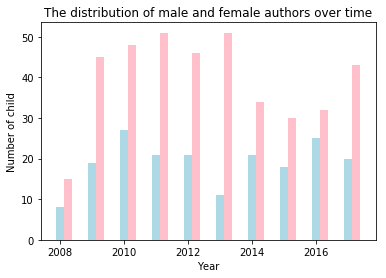

In [30]:
# Creating a new list, where 0.25 is added to each year
years_shifted = [x + 0.25 for x in years]

# Plotting males_by_yr by year
plt.bar(years, males_by_yr, width=0.25, color='lightblue')

# Plotting females_by_yr by years_shifted
plt.bar(years_shifted, females_by_yr, width=0.25, color='pink')
plt.xlabel('Year')
plt.title('The distribution of male and female authors over time')
plt.ylabel('Number of child')
plt.show()

Let's take a closer look at 'Unknown' result, why some authors' name are assigned with "unknown" gender.
The assumption here is those authors probably were foreign-born, thus their names don't match with the Social Security Dataset.
<p>Let's explore the trend of foreign-born authors with no name matches in the social security dataset.</p>

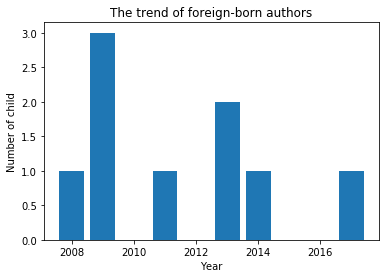

In [31]:
%matplotlib inline

# Plotting the bar chart
plt.bar(years, unknown_by_yr)
plt.xlabel('Year')
plt.title('The trend of foreign-born authors')
plt.ylabel('Number of child')
plt.show()